In [1]:
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)


Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [4]:
y_train.shape,y_test.shape


((50000, 1), (10000, 1))

In [5]:
import numpy as np
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


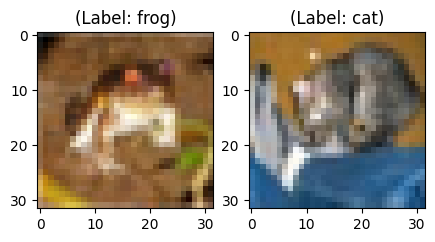

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


In [9]:
np.min(x_train),np.max(x_train)


(0, 255)

In [10]:
x_train = x_train/255.0


In [11]:
np.min(x_train),np.max(x_train)


(0.0, 1.0)

In [12]:
x_train.shape


(50000, 32, 32, 3)

In [13]:
x_train_flat = x_train.reshape(-1,3072)


In [14]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [15]:
import pandas as pd
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)


In [16]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))


Size of the dataframe: (50000, 3073)


In [17]:
df_cifar.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [18]:
from sklearn.decomposition import PCA

pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])


In [19]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train


In [20]:
principal_cifar_Df.head()


,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [21]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))


Explained variation per principal component: [0.2907663  0.11253144]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

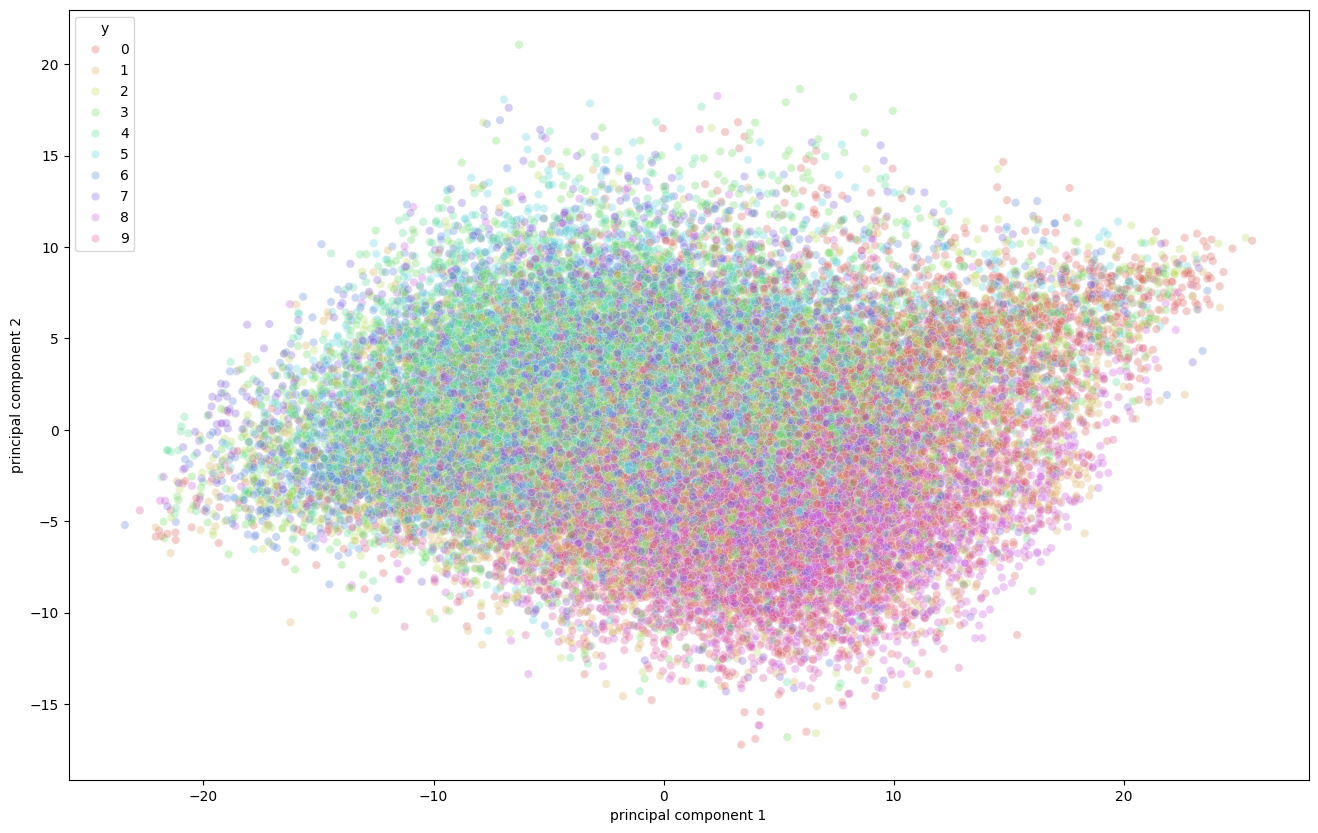

In [22]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)


In [23]:
x_test = x_test/255.0


In [24]:
x_test = x_test.reshape(-1,32,32,3)


In [25]:
x_test_flat = x_test.reshape(-1,3072)


In [26]:
pca = PCA(0.9)


In [27]:
pca.fit(x_train_flat)


PCA(n_components=0.9)

In [28]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


PCA(n_components=0.9)

In [29]:
pca.n_components_


99

In [30]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)


In [31]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import np_utils
from keras.utils import to_categorical
from keras.optimizers import RMSprop


In [32]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [33]:
batch_size = 128
num_classes = 10
epochs = 20


In [34]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [35]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              102400    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1810698 (6.91 MB)
Trainable params: 1810698 (6.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))


Epoch 1/20


391/391 [==============================] - 59s 139ms/step - loss: 1.6377 - accuracy: 0.4182 - val_loss: 1.5192 - val_accuracy: 0.4675
Epoch 2/20
391/391 [==============================] - 56s 143ms/step - loss: 1.3281 - accuracy: 0.5287 - val_loss: 1.3416 - val_accuracy: 0.5242
Epoch 3/20
391/391 [==============================] - 51s 129ms/step - loss: 1.1517 - accuracy: 0.5910 - val_loss: 1.3078 - val_accuracy: 0.5393
Epoch 4/20
391/391 [==============================] - 81s 207ms/step - loss: 0.9978 - accuracy: 0.6442 - val_loss: 1.3677 - val_accuracy: 0.5361
Epoch 5/20
391/391 [==============================] - 79s 202ms/step - loss: 0.8441 - accuracy: 0.6984 - val_loss: 1.3714 - val_accuracy: 0.5606
Epoch 6/20
391/391 [==============================] - 74s 190ms/step - loss: 0.6880 - accuracy: 0.7537 - val_loss: 1.5480 - val_accuracy: 0.5359
Epoch 7/20
391/391 [==============================] - 78s 199ms/step - loss: 0.5481 - accuracy: 0.8035 - val_loss: 1.5691 - val_

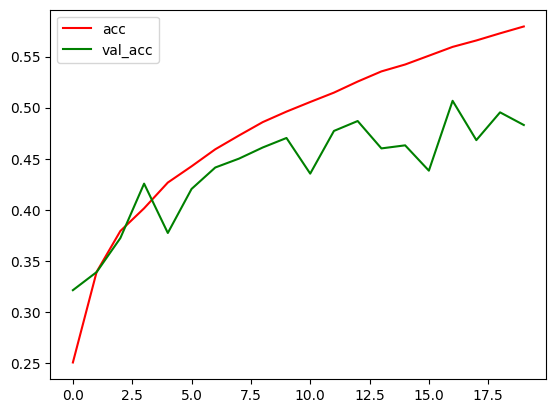

In [39]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 241ms/step
Predicted label is cat


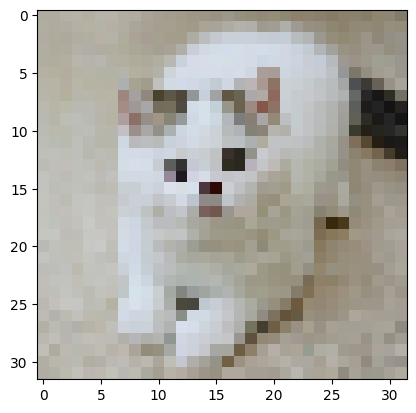

In [63]:
from keras.preprocessing import image
# label mapping
labels = '''airplane automobile bird cat deer dog frog horseship truck'''.split()

# select the image from our test dataset
# image_number = 0
image_path = "imageTest/kucing.jpg"
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array.reshape(-1, 3072)
img_array = img_array / 255.0
plt.imshow(img_array.reshape((32, 32, 3)))

# display the image
# plt.imshow(x_test[image_number])
# plt.imshow(x_test[image_number])

# load the image in an array
# n = np.array(x_test[image_number])

# reshape it
# p = n.reshape(-1, 3072)

# pass in the network for prediction and 
# save the predicted label label_dict
# predicted_label = labels[model.predict(p).argmax()]
predicted_label = labels[model.predict(img_array).argmax()]

# load the original label
# original_label = labels[np.argmax(img_array)]

# display the result
# print("Original label is {} and predicted label is {}".format(
	# original_label, predicted_label))
print("Predicted label is {}".format(predicted_label))

In [37]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))


Epoch 1/20
391/391 [==============================] - 123s 305ms/step - loss: 2.0833 - accuracy: 0.2505 - val_loss: 1.8708 - val_accuracy: 0.3213
Epoch 2/20
391/391 [==============================] - 113s 288ms/step - loss: 1.8271 - accuracy: 0.3392 - val_loss: 1.8189 - val_accuracy: 0.3390
Epoch 3/20
391/391 [==============================] - 111s 284ms/step - loss: 1.7277 - accuracy: 0.3792 - val_loss: 1.7839 - val_accuracy: 0.3723
Epoch 4/20
391/391 [==============================] - 110s 281ms/step - loss: 1.6611 - accuracy: 0.4014 - val_loss: 1.6017 - val_accuracy: 0.4256
Epoch 5/20
391/391 [==============================] - 112s 286ms/step - loss: 1.5979 - accuracy: 0.4267 - val_loss: 1.8429 - val_accuracy: 0.3773
Epoch 6/20
391/391 [==============================] - 111s 285ms/step - loss: 1.5517 - accuracy: 0.4426 - val_loss: 1.6576 - val_accuracy: 0.4204
Epoch 7/20
391/391 [==============================] - 108s 277ms/step - loss: 1.5125 - accuracy: 0.4592 - val_loss: 1.5720 -

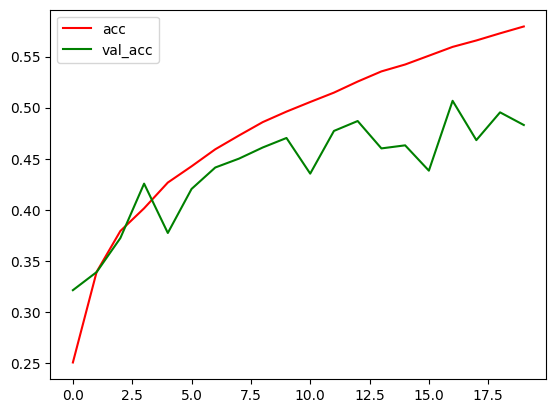

In [40]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()